# Exploratory Data Analysis on facilities dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [2]:
facilities = pd.read_csv("Facilities.csv")
human_resources = pd.read_csv("Human Resources.csv")
age_standardized = pd.read_csv("Age-standardized suicide rates.csv")
crude_suicides = pd.read_csv("Crude suicide rates.csv")

In [3]:
facilities.head(10)

,Country,Year,Mental _hospitals,health_units,outpatient _facilities,day _treatment,residential_facilities
0,Afghanistan,2016,0.003,0.012,0.006,NaN,NaN
1,Albania,2016,0.068,0.068,0.410,NaN,0.445
2,Algeria,2016,0.048,0.068,0.048,NaN,NaN
3,Angola,2016,0.011,NaN,NaN,NaN,0.014
4,Antigua and Barbuda,2016,1.001,NaN,NaN,NaN,NaN
5,Argentina,2016,0.937,1.071,1.720,NaN,0.152
6,Armenia,2016,NaN,0.069,1.371,0.034,NaN
7,Azerbaijan,2016,0.114,0.021,0.156,0.094,0.031
8,Bangladesh,2016,0.001,0.035,0.055,NaN,0.045
9,Belarus,2016,0.200,0.063,0.116,0.285,NaN


In [4]:
print(facilities.shape)
print(facilities.dtypes)

(112, 7)
Country                    object
Year                        int64
Mental _hospitals         float64
health_units              float64
outpatient _facilities    float64
day _treatment            float64
residential_facilities    float64
dtype: object


In [5]:
print(facilities.isnull().sum())

Country                    0
Year                       0
Mental _hospitals         22
health_units              10
outpatient _facilities    12
day _treatment            61
residential_facilities    67
dtype: int64


In [6]:
facilities = facilities.drop(columns=["day _treatment", "residential_facilities"])

facilities["Mental _hospitals"].fillna(facilities["Mental _hospitals"].median(), inplace = True)
facilities["health_units"].fillna(facilities["health_units"].median(), inplace = True)
facilities["outpatient _facilities"].fillna(facilities["outpatient _facilities"].median(), inplace = True)

In [7]:
print(facilities.isnull().sum())

Country                   0
Year                      0
Mental _hospitals         0
health_units              0
outpatient _facilities    0
dtype: int64


In [65]:
print(age_standardized.isnull().sum())

Country    0
Sex        0
2016       0
2015       0
2010       0
2000       0
dtype: int64


In [8]:
facilities = facilities.drop(columns=["Year"])

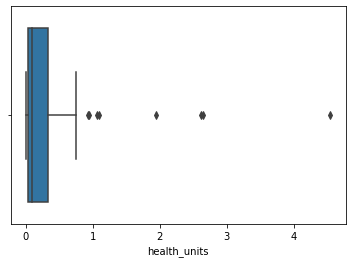

In [9]:
sns.boxplot(x= facilities["health_units"]);

In [10]:
median = facilities['health_units'].median()
facilities["health_units"] = np.where(facilities["health_units"] >1, median,facilities['health_units'])

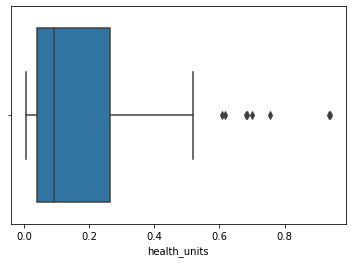

In [11]:
sns.boxplot(x= facilities["health_units"]);

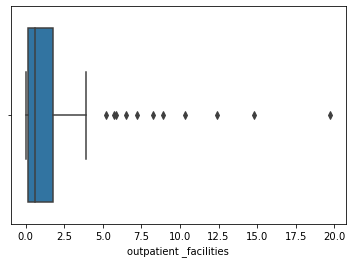

In [12]:
sns.boxplot(x = facilities["outpatient _facilities"]);

In [13]:
median = facilities['outpatient _facilities'].median()
facilities["outpatient _facilities"] = np.where(facilities["outpatient _facilities"] >5, median,facilities['outpatient _facilities'])

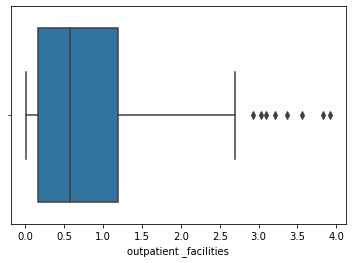

In [14]:
sns.boxplot(x = facilities["outpatient _facilities"]);

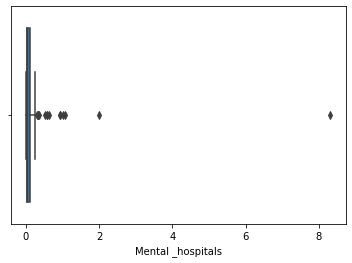

In [15]:
sns.boxplot(x=facilities["Mental _hospitals"]);

In [16]:
median = facilities['Mental _hospitals'].median()
facilities["Mental _hospitals"] = np.where(facilities["Mental _hospitals"] >1, median,facilities['Mental _hospitals'])

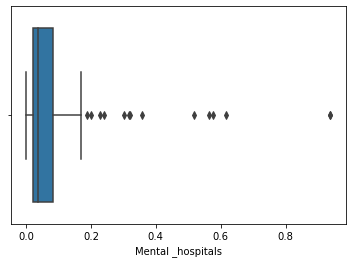

In [17]:
sns.boxplot(x=facilities["Mental _hospitals"]);

Text(0, 0.5, 'frequency')

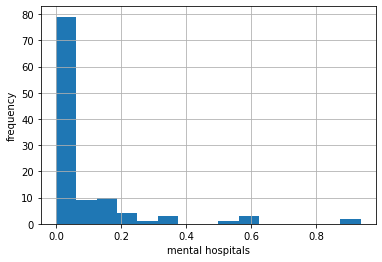

In [18]:
facilities["Mental _hospitals"].hist(bins = 15, alpha = 1.0)
plt.xlabel("mental hospitals")
plt.ylabel("frequency")

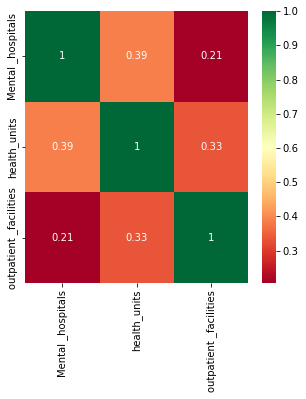

In [19]:
plt.figure(figsize = (5,5))
corelations = facilities.corr()
sns.heatmap(corelations,cmap="RdYlGn",annot=True)
corelations;

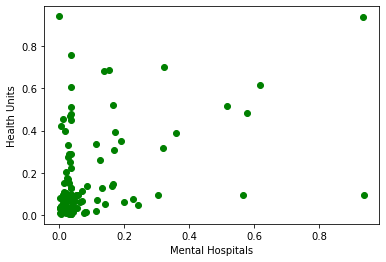

In [20]:
plt.scatter(facilities["Mental _hospitals"],facilities["health_units"], color = "green")
plt.xlabel('Mental Hospitals')
plt.ylabel('Health Units')
plt.show()

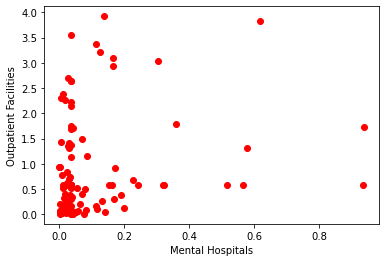

In [21]:
plt.scatter(facilities["Mental _hospitals"],facilities["outpatient _facilities"], color = "red")
plt.xlabel('Mental Hospitals')
plt.ylabel('Outpatient Facilities')
plt.show()

In [22]:
human_resources.head()

,Country,Year,Psychiatrists,Nurses,Social_workers,Psychologists
0,Afghanistan,2016,0.231,0.098,NaN,0.296
1,Albania,2016,1.471,6.876,1.060,1.231
2,Angola,2016,0.057,0.660,0.022,0.179
3,Antigua and Barbuda,2016,1.001,7.005,4.003,NaN
4,Argentina,2016,21.705,NaN,NaN,222.572


In [66]:
age_standardized.head()

,Country,Sex,2016,2015,2010,2000
0,Afghanistan,Both sexes,6.4,6.6,7.4,8.1
1,Afghanistan,Male,10.6,10.9,12.5,14.3
2,Afghanistan,Female,2.1,2.1,2.1,1.7
3,Albania,Both sexes,5.6,5.3,7.7,5.8
4,Albania,Male,7.0,6.7,9.5,8.2


In [67]:
crude_suicides.head()

,Country,Sex,80_above,70to79,60to69,50to59,40to49,30to39,20to29,10to19
0,Afghanistan,Both sexes,42.0,11.0,5.5,5.6,6.6,9.2,10.2,3.1
1,Afghanistan,Male,70.4,20.9,9.8,9.3,10.5,15.1,16.3,4.8
2,Afghanistan,Female,20.1,2.3,1.4,1.6,2.3,2.7,3.5,1.2
3,Albania,Both sexes,16.3,8.3,6.0,7.8,9.1,6.1,6.5,5.0
4,Albania,Male,23.2,11.9,8.1,11.4,13.5,8.8,6.3,3.1


In [23]:
print(human_resources.shape)
print(human_resources.dtypes)

(107, 6)
Country            object
Year                int64
Psychiatrists     float64
Nurses            float64
Social_workers    float64
Psychologists     float64
dtype: object


In [24]:
print(human_resources.isnull().sum())

Country            0
Year               0
Psychiatrists      3
Nurses            16
Social_workers    39
Psychologists     23
dtype: int64


In [25]:
human_resources["Psychiatrists"].fillna(human_resources["Psychiatrists"].median(), inplace = True)
human_resources["Nurses"].fillna(human_resources["Nurses"].median(), inplace = True)
human_resources["Social_workers"].fillna(human_resources["Social_workers"].median(), inplace = True)
human_resources["Psychologists"].fillna(human_resources["Psychologists"].median(), inplace = True)

In [26]:
print(human_resources.isnull().sum())

Country           0
Year              0
Psychiatrists     0
Nurses            0
Social_workers    0
Psychologists     0
dtype: int64


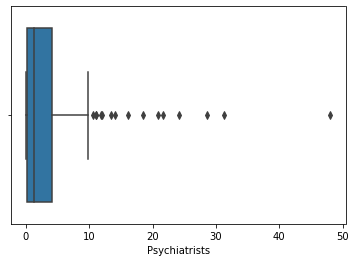

In [27]:
sns.boxplot(x=human_resources["Psychiatrists"]);

In [28]:
median = human_resources['Psychiatrists'].median()
human_resources["Psychiatrists"] = np.where(human_resources['Psychiatrists'] >12, median,human_resources['Psychiatrists'])

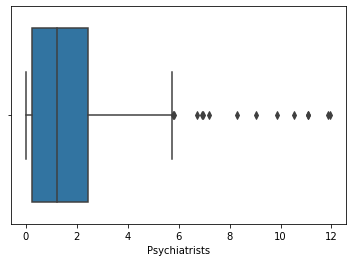

In [29]:
sns.boxplot(x=human_resources["Psychiatrists"]);

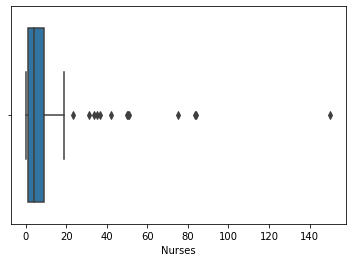

In [30]:
sns.boxplot(x=human_resources["Nurses"]);

In [31]:
median = human_resources['Nurses'].median()
human_resources["Nurses"] = np.where(human_resources['Nurses'] >22, median,human_resources['Nurses'])

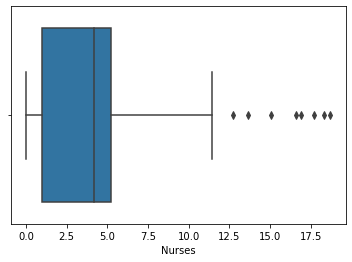

In [32]:
sns.boxplot(x=human_resources["Nurses"]);

Text(0.5, 1.0, 'Frequency of number of psychiatrists')

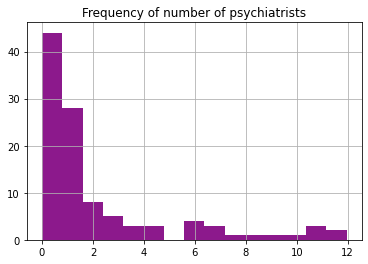

In [33]:
human_resources["Psychiatrists"].hist(bins = 15, alpha = 0.9, color = "purple");
plt.title("Frequency of number of psychiatrists")

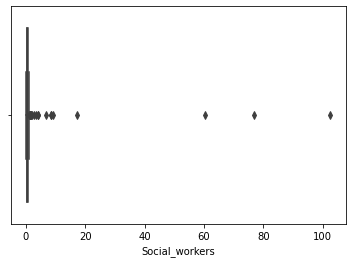

In [34]:
sns.boxplot(x=human_resources["Social_workers"]);

In [35]:
median = human_resources['Social_workers'].median()
human_resources["Social_workers"] = np.where(human_resources['Social_workers'] >5, median,human_resources['Social_workers'])

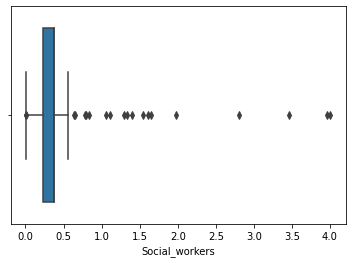

In [36]:
sns.boxplot(x=human_resources["Social_workers"]);

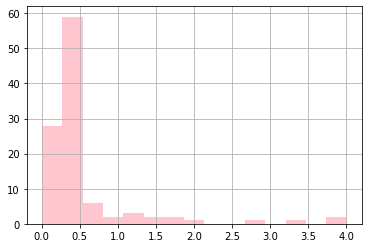

In [37]:
human_resources["Social_workers"].hist(bins = 15, alpha = 0.9, color = "pink");

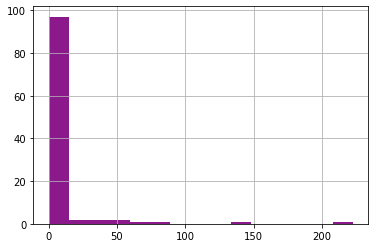

In [38]:
human_resources["Psychologists"].hist(bins = 15, alpha = 0.9, color = "purple");

(0.0, 50.0)

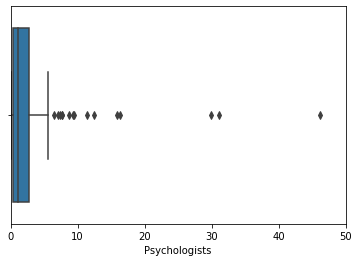

In [39]:
sns.boxplot(x= human_resources["Psychologists"])
plt.xlim(0,50)

In [40]:
median = human_resources['Psychologists'].median()
human_resources["Psychologists"] = np.where(human_resources['Psychologists'] >7, median,human_resources['Psychologists'])

<AxesSubplot:xlabel='Psychologists'>

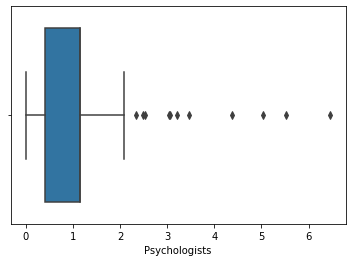

In [41]:
sns.boxplot(x= human_resources["Psychologists"])


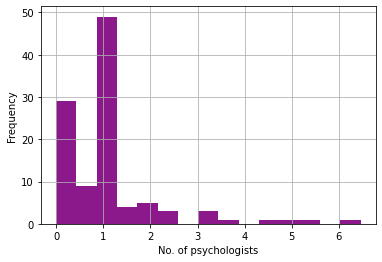

In [42]:
human_resources["Psychologists"].hist(bins = 15, alpha = 0.9, color = "purple");
plt.xlabel("No. of psychologists")
plt.ylabel("Frequency");


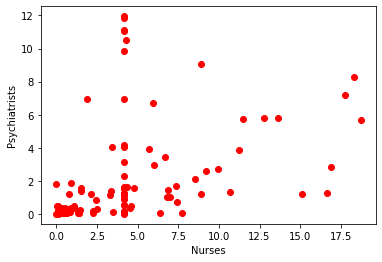

In [43]:
plt.scatter(human_resources["Nurses"],human_resources["Psychiatrists"], color = "red")
plt.xlabel('Nurses')
plt.ylabel('Psychiatrists')
plt.show();

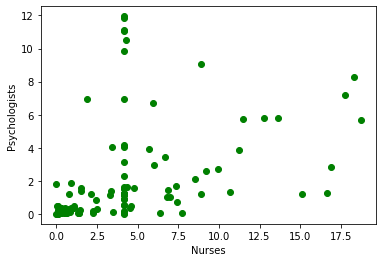

In [44]:
plt.scatter(human_resources["Nurses"],human_resources["Psychiatrists"], color = "green")
plt.xlabel('Nurses')
plt.ylabel('Psychologists')
plt.show();

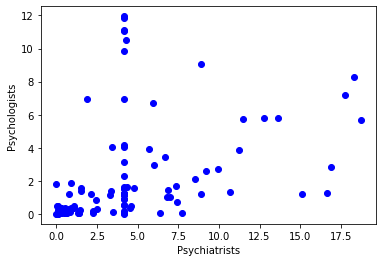

In [45]:
plt.scatter(human_resources["Nurses"],human_resources["Psychiatrists"], color = "blue")
plt.xlabel('Psychiatrists')
plt.ylabel('Psychologists')
plt.show();

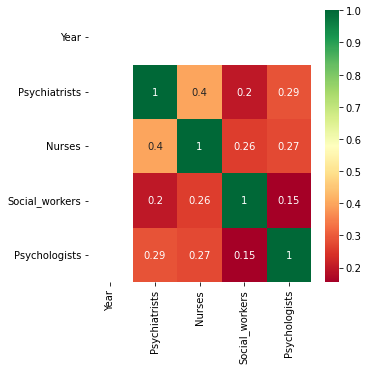

In [46]:
plt.figure(figsize = (5,5))
corelations = human_resources.corr()
sns.heatmap(corelations,cmap="RdYlGn",annot=True)
corelations;

In [47]:
age_standardized.head()

,Country,Sex,2016,2015,2010,2000
0,Afghanistan,Both sexes,6.4,6.6,7.4,8.1
1,Afghanistan,Male,10.6,10.9,12.5,14.3
2,Afghanistan,Female,2.1,2.1,2.1,1.7
3,Albania,Both sexes,5.6,5.3,7.7,5.8
4,Albania,Male,7.0,6.7,9.5,8.2


In [48]:
crude_suicides.head()

,Country,Sex,80_above,70to79,60to69,50to59,40to49,30to39,20to29,10to19
0,Afghanistan,Both sexes,42.0,11.0,5.5,5.6,6.6,9.2,10.2,3.1
1,Afghanistan,Male,70.4,20.9,9.8,9.3,10.5,15.1,16.3,4.8
2,Afghanistan,Female,20.1,2.3,1.4,1.6,2.3,2.7,3.5,1.2
3,Albania,Both sexes,16.3,8.3,6.0,7.8,9.1,6.1,6.5,5.0
4,Albania,Male,23.2,11.9,8.1,11.4,13.5,8.8,6.3,3.1


In [49]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objects as go

In [50]:
suicide_long = pd.melt(crude_suicides, id_vars = ['Country','Sex'], var_name='Age', value_name='Suicide_num')
suicide_long

,Country,Sex,Age,Suicide_num
0,Afghanistan,Both sexes,80_above,42.0
1,Afghanistan,Male,80_above,70.4
2,Afghanistan,Female,80_above,20.1
3,Albania,Both sexes,80_above,16.3
4,Albania,Male,80_above,23.2
...,...,...,...,...
4387,Zambia,Male,10to19,3.9
4388,Zambia,Female,10to19,1.6
4389,Zimbabwe,Both sexes,10to19,4.6
4390,Zimbabwe,Male,10to19,6.4


In [51]:
index_MFSexes = crude_suicides[(crude_suicides['Sex'] == 'Male') | (crude_suicides['Sex'] == 'Female')].index
# Delete these row indexes from dataFrame
df_BothSex_suicide = crude_suicides.drop(index_MFSexes)

df_BothSex_suicide['Total_suicide_number'] = df_BothSex_suicide[list(df_BothSex_suicide.columns)].sum(axis=1)
df_BothSex_suicide.head(3)

C:\Users\Kshitij\AppData\Local\Temp/ipykernel_11460/2858338061.py:5: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,Country,Sex,80_above,70to79,60to69,50to59,40to49,30to39,20to29,10to19,Total_suicide_number
0,Afghanistan,Both sexes,42.0,11.0,5.5,5.6,6.6,9.2,10.2,3.1,93.2
1,Afghanistan,Male,70.4,20.9,9.8,9.3,10.5,15.1,16.3,4.8,157.1
2,Afghanistan,Female,20.1,2.3,1.4,1.6,2.3,2.7,3.5,1.2,35.1


In [52]:
count = [ dict(
        # set the map type is choropleth   
        type = 'choropleth',
        locations = df_BothSex_suicide['Country'],
        locationmode='country names',
        z = df_BothSex_suicide['Total_suicide_number'],
        text = df_BothSex_suicide['Country'],
        colorscale = 'Viridis',
        autocolorscale = False,
        reversescale = True,
        # set the plotly gragh color 
        marker = dict(
            line = dict (
                color = 'rgb(160,160,160)',
                width = 0.5
            ) ),
        # add a color bar 
        colorbar = dict(
            autotick =False,
            title = 'Total Suicide Number Country-based'),
      ) ]
# create layout for gragh
layout = dict(
    title = 'Total Suicide Number',
    geo = dict(
        showframe = True,
        showcoastlines = True,
        projection = dict(
            type = 'Mercator'
        )
    )
)
fig = dict( data=count, layout=layout )
iplot( fig, validate=False, filename='d3-world-map' )

In [53]:
import plotly.graph_objects as go

# use the bar plot in go function to show the suicide number across the world
fig = go.Figure([go.Bar(x=df_BothSex_suicide['Country'], y=df_BothSex_suicide['Total_suicide_number'])])
# setting layout with title and sort the country
fig.update_layout(title="Sort the Suicide Number Across the World",barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

In [54]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

C:\Users\Kshitij\AppData\Local\Temp/ipykernel_11460/964395601.py:10: MatplotlibDeprecationWarning:

Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.



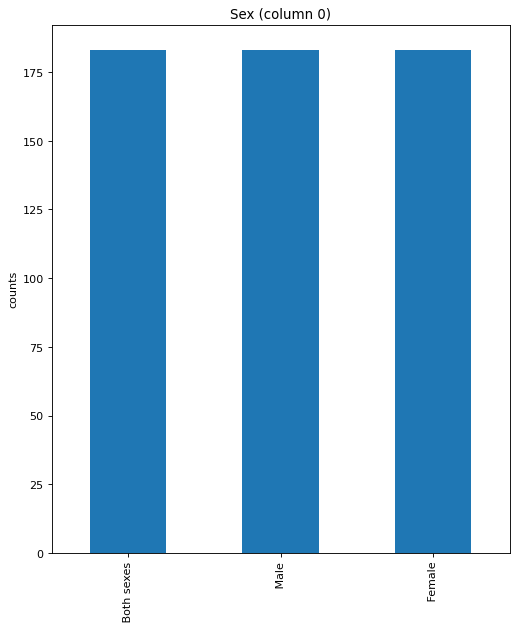

In [55]:
plotPerColumnDistribution(age_standardized, 10, 5)

In [56]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):

    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title("age standardized suicide rates correlation matrix")
    
    plt.show()

C:\Users\Kshitij\AppData\Local\Temp/ipykernel_11460/3601970287.py:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only



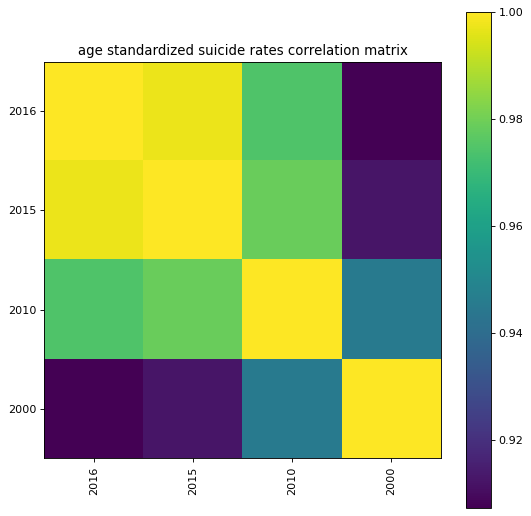

In [57]:
plotCorrelationMatrix(age_standardized, 8);


C:\Users\Kshitij\AppData\Local\Temp/ipykernel_11460/964395601.py:10: MatplotlibDeprecationWarning:

Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.



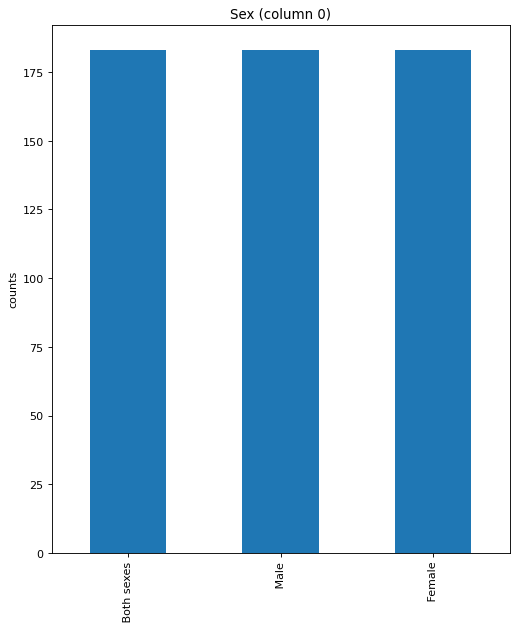

In [58]:
plotPerColumnDistribution(crude_suicides, 10, 5)


In [59]:
# Correlation matrix
def plotCorrelationMatrix2(df, graphWidth):

    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title("crude suicide rates correlation matrix")
    
    plt.show()

C:\Users\Kshitij\AppData\Local\Temp/ipykernel_11460/146921424.py:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only



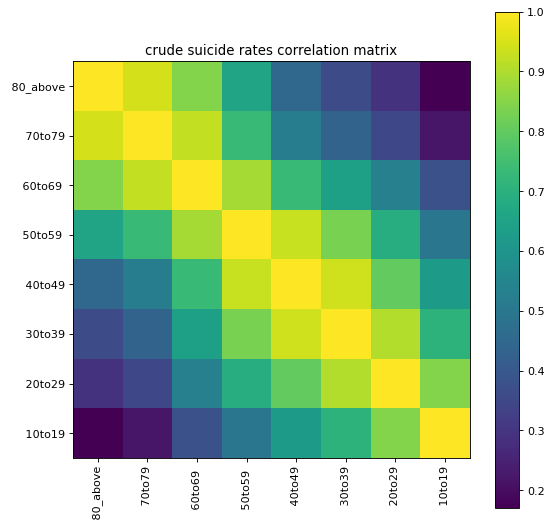

In [60]:
plotCorrelationMatrix2(crude_suicides, 8);


In [61]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

C:\Users\Kshitij\AppData\Local\Temp/ipykernel_11460/102845399.py:5: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only



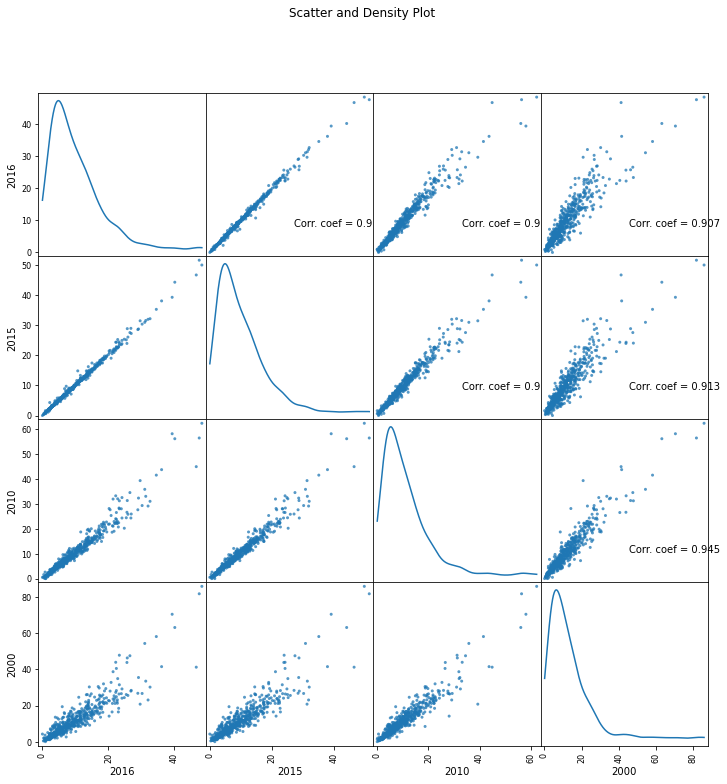

In [62]:
plotScatterMatrix(age_standardized, 12, 10)

C:\Users\Kshitij\AppData\Local\Temp/ipykernel_11460/102845399.py:5: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only



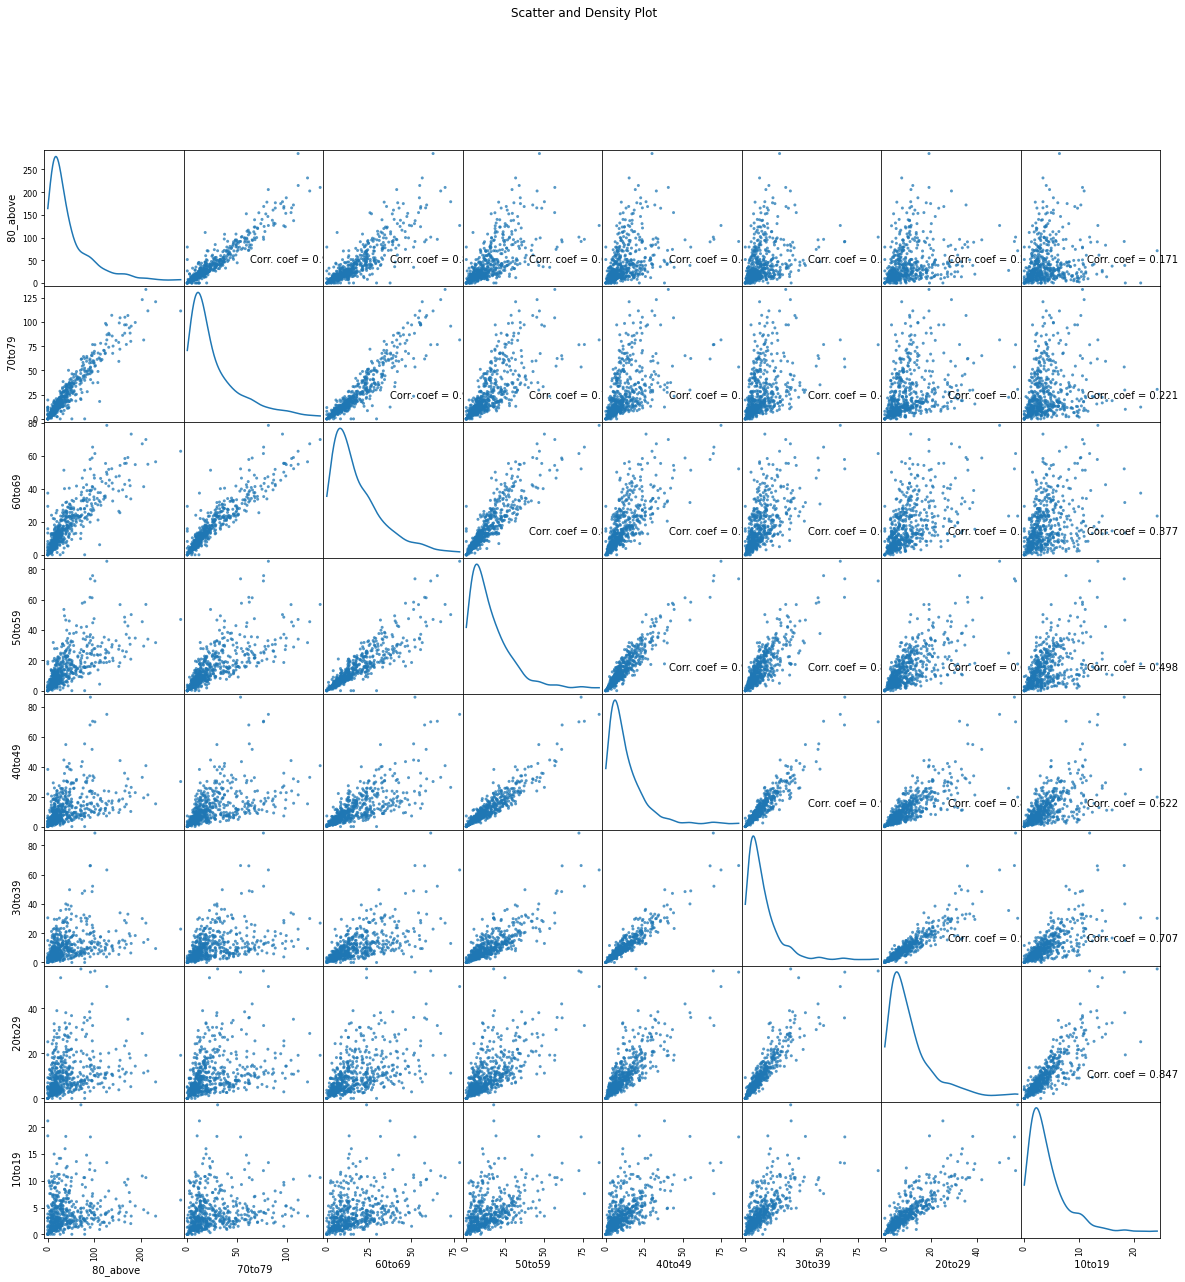

In [63]:
plotScatterMatrix(crude_suicides, 20, 10)

***